In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

# Precipitation Analysis

In [10]:
query = session.query(Measurement).statement
measurement_df = pd.read_sql_query(query,session.bind)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
max_date= measurement_df['date'].max()
max_date

'2017-08-23'

In [12]:
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>'2016-08-23').filter(Measurement.date<=max_date).all()
results

prcp_df = pd.DataFrame(results).set_index('date')
prcp_df.fillna("")
prcp_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


C:\Users\HP Book Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


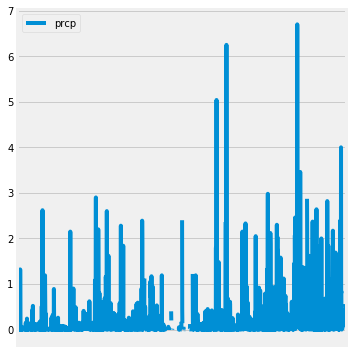

In [125]:
prcp_df.plot(figsize=(5,5))
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.tight_layout()

In [14]:
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
prcp_df.to_csv("pcrp_df.csv")

# Station Analysis

In [16]:
query2 = session.query(Station).statement
station_df = pd.read_sql_query(query2,session.bind)
station_df.to_csv("station_df.csv")
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [17]:
# Design a query to show how many stations are available in this dataset?
results = session.query(Station.station).count()
results


9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [19]:
merged_df = pd.merge(measurement_df,station_df,on='station',how='left')
merged_df.count()

id_x         19550
station      19550
date         19550
prcp         18103
tobs         19550
id_y         19550
name         19550
latitude     19550
longitude    19550
elevation    19550
dtype: int64

In [20]:
merged_df['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [21]:
active_station = merged_df.loc[merged_df['station']=='USC00519281']
active_station.head()

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
12187,12188,USC00519281,2010-01-01,0.15,70.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
12188,12189,USC00519281,2010-01-02,0.00,62.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
12189,12190,USC00519281,2010-01-03,0.00,74.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
12190,12191,USC00519281,2010-01-04,0.00,75.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
12191,12192,USC00519281,2010-01-05,0.00,74.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


In [22]:
mintemp = active_station['tobs'].min()
mintemp

54.0

In [23]:
hightemp = active_station['tobs'].max()
hightemp

85.0

In [24]:
meantemp = active_station['tobs'].mean()
meantemp

71.66378066378067

In [25]:
active_station['date'].max()

'2017-08-18'

In [26]:
lastyearactive = active_station.loc[active_station['date']>='2016-06-18']
lastyearactive.head()

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
14541,14542,USC00519281,2016-06-18,0.40,75.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
14542,14543,USC00519281,2016-06-19,0.05,75.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
14543,14544,USC00519281,2016-06-20,0.40,72.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
14544,14545,USC00519281,2016-06-21,0.04,72.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
14545,14546,USC00519281,2016-06-22,0.13,75.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


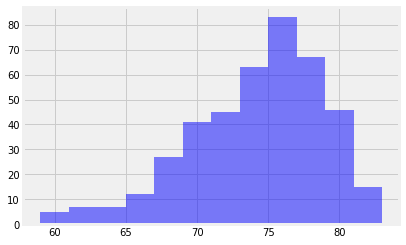

In [27]:
x = lastyearactive['tobs']
num_bins = 12
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [28]:
tobs_df = merged_df.loc[merged_df['date']>='2016-06-18']
tobs_df.head()
tobs_df.to_csv('tobs_df.csv')

In [110]:
def calc_temps(start, end):

    results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    
    for min, avg, max in results:
        starttemps = {}
        starttemps['Min Temp'] = min 
        starttemps['Avg Temp'] = avg 
        starttemps['Max Temp'] = max 
        
        return (starttemps)

In [111]:
start = input('When does your trip start')

When does your trip start2016-01-23


In [112]:
end = input('When does your trip end')

When does your trip end2016-02-10


In [119]:
triptemps = calc_temps(start,end)
triptemps

{'Min Temp': 56.0, 'Avg Temp': 68.98333333333333, 'Max Temp': 78.0}

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [116]:
trip_df = pd.DataFrame(triptemps,index=[''],)

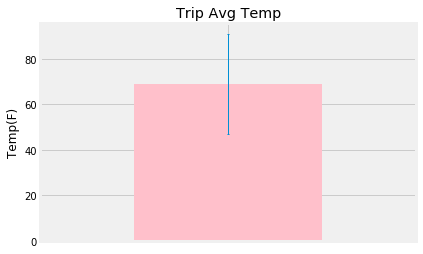

In [117]:
trip_df['Avg Temp'].plot.bar(title='Trip Avg Temp',color='pink')
plt.ylabel('Temp(F)')
plt.errorbar(trip_df.index, trip_df['Avg Temp'], yerr=trip_df['Max Temp']-trip_df['Min Temp'],elinewidth=1,capsize=1)
plt.show()